In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from integration.integrate import *

In [3]:
@jit(nopython=True)
def f(x,t,sigma=10, beta=8/3,rho=28):
    X,Y,Z = x
    return np.array([sigma*(Y-X), X*(rho-Z)-Y, X*Y - (beta*Z)])


@jit(nopython=True)
def g(x,t):
    return np.zeros(3)

In [4]:
ti,tf,dt = 0,100,0.001
times = np.arange(ti,tf,dt)
x0=np.array([-8,7,27])
xx1 = integrate(f,g,x0,times,dt,mode="euler")

In [5]:
np.save("data/lorenz/{}_{}_{}".format(ti,tf,dt), xx1)

Text(0.5, 0.92, 'Lorenz Attractor')

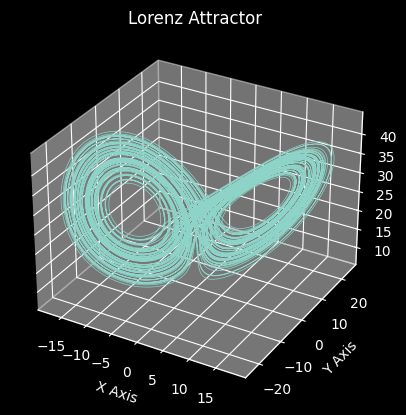

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*xx1[:], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")


/tmp/ipykernel_9274/4270390497.py:3: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(*10*xx1[:]**0.5, lw=0.2,alpha=0.5, color="red")


Text(0.5, 0.92, '$dx = \\sigma (y-x)$\n$dy =$')

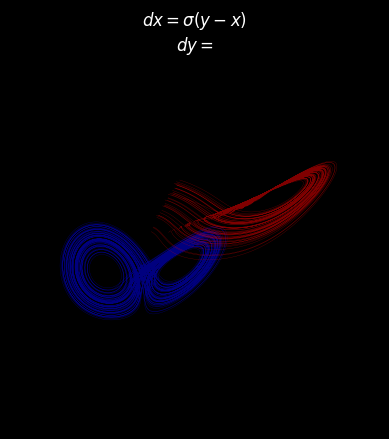

In [23]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*xx1[:], lw=0.2,alpha=0.5, color="blue")
ax.plot(*10*xx1[:]**0.5, lw=0.2,alpha=0.5, color="red")

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_axis_off()

ax.set_title(r'$dx = \sigma (y-x)$'+"\n"+r'$dy =$')